# Análisis de Relaciones

In [22]:
import os
os.environ["MPLBACKEND"] = "agg"
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Comenzamos por importar las librerias.

In [23]:
# estaremos definiendo ambos csvs para poder tener acceso a ambos pero usaremos el train y luego sobre el test replicaremos una vez se considere importante
dftest = pd.read_csv("../data/test.csv")

# Definir NA como nuestros NaN
dftrain = pd.read_csv("../data/train.csv", na_values=["NA"])

# incluimos en el analissi exploratorio lo basico para poder tenerlo a la mano
dftrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


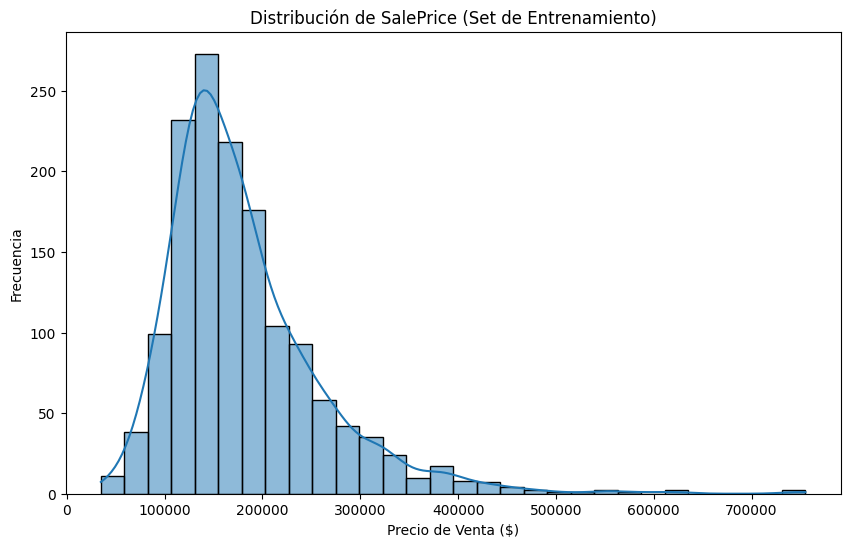

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(dftrain['SalePrice'], bins=30, kde=True)
plt.title('Distribución de SalePrice (Set de Entrenamiento)')
plt.xlabel('Precio de Venta ($)')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas básicas
print(dftrain['SalePrice'].describe())

## ¿Qué podemos concluir?
- Sesgo Positivo: La distribución de SalePrice está sesgada hacia la derecha, lo que es típico en precios de viviendas. Esto significa que hay más casas con precios bajos a medios, y pocas con precios muy altos.
- Rango: Los precios varían desde aproximadamente $50,000 hasta $700,000, con la mayoría (más del 50%) entre $100,000 y $250,000.

Outliers en GrLivArea:
        Id  GrLivArea  SalePrice  OverallQual Neighborhood
58      59       2945     438780           10      StoneBr
118    119       3222     320000            7      SawyerW
185    186       3608     475000           10      OldTown
197    198       3112     235000            8        NAmes
231    232       2794     403000            8      NoRidge
304    305       3493     295000            7      OldTown
324    325       2978     242000            7        NAmes
496    497       3228     430000            8      NoRidge
523    524       4676     184750           10      Edwards
583    584       2775     325000           10      OldTown
608    609       3194     359100            8      Crawfor
635    636       3395     200000            6        SWISU
691    692       4316     755000           10      NoRidge
769    770       3279     538000            8      StoneBr
798    799       3140     485000            9      NridgHt
803    804       2822     582933 

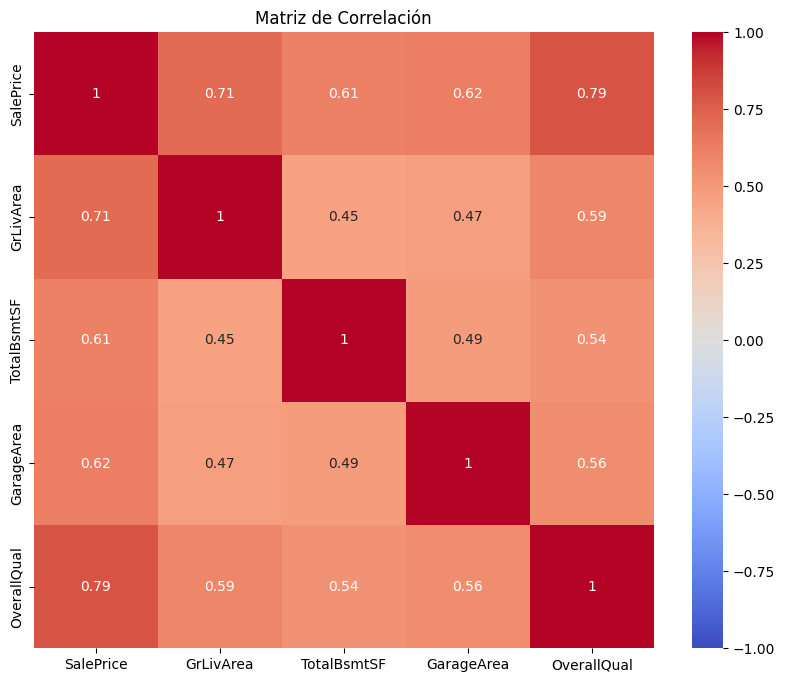

In [25]:

Q1 = dftrain['GrLivArea'].quantile(0.25)
Q3 = dftrain['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dftrain[(dftrain['GrLivArea'] < lower_bound) | (dftrain['GrLivArea'] > upper_bound)]
print("Outliers en GrLivArea:")
print(outliers[['Id', 'GrLivArea', 'SalePrice', 'OverallQual', 'Neighborhood']])

# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = dftrain[['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'OverallQual']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

## Resumen de la Matriz de Correlación

La matriz de correlación muestra que OverallQual (0.79) y GrLivArea (0.71) son los predictores más fuertes de SalePrice, indicando una relación positiva significativa con el precio de venta. GarageArea (0.62) y TotalBsmtSF (0.61) también influyen, aunque menos. No hay multicolinealidad severa (correlaciones 0.45-0.59), permitiendo usar estas variables juntas en un modelo.

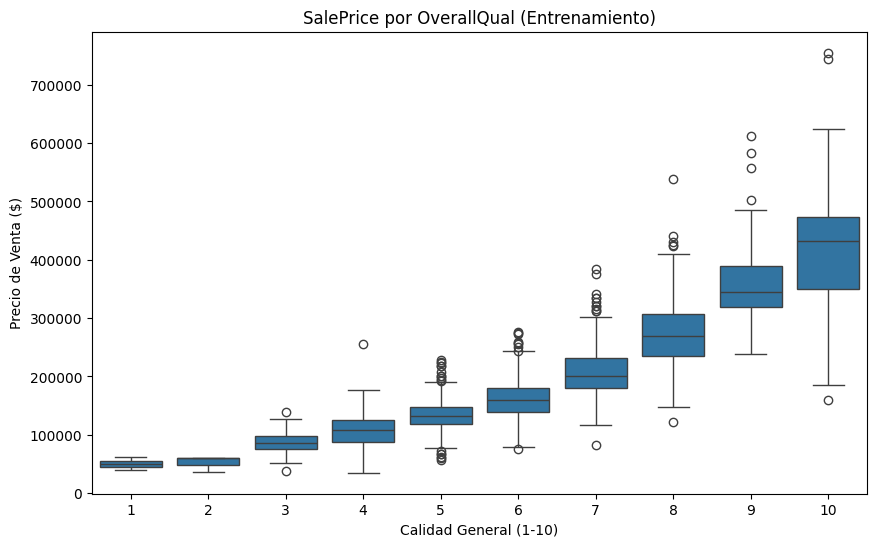

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=dftrain)
plt.title('SalePrice por OverallQual (Entrenamiento)')
plt.xlabel('Calidad General (1-10)')
plt.ylabel('Precio de Venta ($)')
plt.show()

## Lo que podemos concluir del precio de venta con la calidad
- Los precios de las casas aumentan consistentemente a medida que la calidad general (OverallQual) sube, desde 1 (muy baja) hasta 10 (muy excelente). Casas con OverallQual bajo (1-4) tienen precios medianos de $50,000-$150,000, mientras que las de OverallQual alto (8-10) alcanzan medianas de $300,000-$400,000.
- La variabilidad en los precios crece con OverallQual más alto, y hay outliers en niveles 8-10, con precios tan altos como $600,000-$700,000, indicando casas excepcionalmente caras con alta calidad.
- OverallQual es un predictor muy importante del precio, con un impacto directo y significativo en el valor de las propiedades.

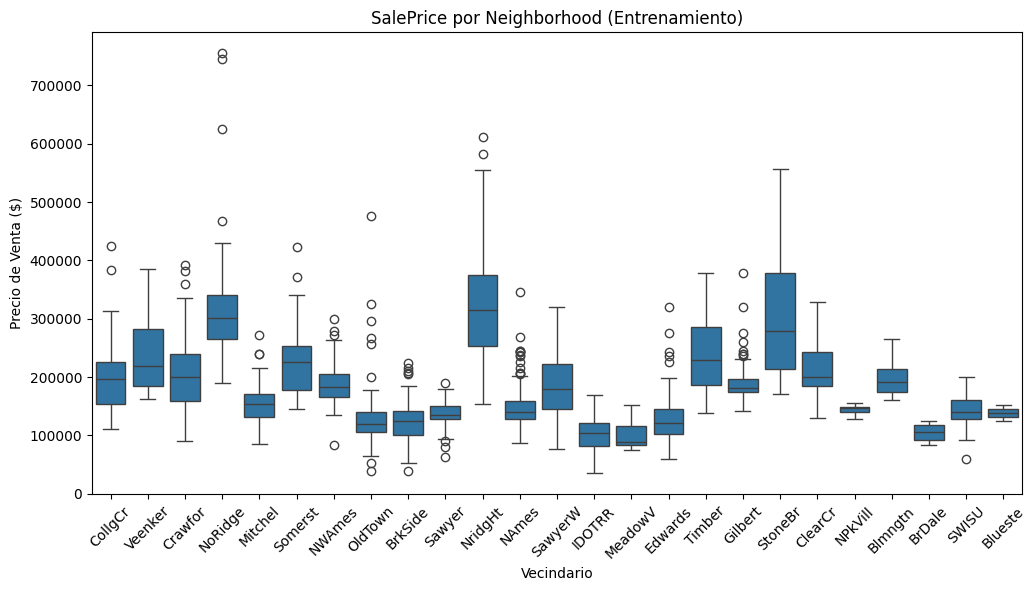

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=dftrain)
plt.title('SalePrice por Neighborhood (Entrenamiento)')
plt.xlabel('Vecindario')
plt.ylabel('Precio de Venta ($)')
plt.xticks(rotation=45)
plt.show()

## Que podemos decir de los condominios?
- Los precios de las casas varían significativamente según el vecindario. Barrios como NoRidge y NridgHt tienen medianas de precios más altos (alrededor de $300,000-$400,000), mientras que barrios como BrDale, IDOTRR, y MeadowV tienen medianas más bajas (cerca de $100,000-$150,000).
- Algunos vecindarios, como NoRidge y NridgHt, tienen outliers con precios muy altos (hasta $600,000-$700,000), indicando casas excepcionalmente caras. Otros, como OldTown o BrkSide, tienen precios más consistentes pero con menos variabilidad.
- La ubicación es un factor clave para el precio de las casas, con barrios premium (NoRidge, NridgHt) asociándose con precios más altos, probablemente debido a mejor calidad, tamaño o prestigio. Barrios menos deseables (IDOTRR cerca de vías férreas) tienen precios más bajos.